### About the Dataset

+ master_id: Unique customer ID.
+ order_channel: Order channel. (online or offline)
+ last_order_channel: Last order channel. (online or offline)
+ first_order_date: Customer's first order date.
+ last_order_date: Customer's last order date.
+ last_order_date_online: Customer's last online order date.
+ last_order_date_offline: Customer's last offline order date.
+ order_num_total_ever_online: Customer's online number of orders total ever.
+ order_num_total_ever_offline: Customer's offline number of orders total ever.
+ customer_value_total_ever_offline: Customer's offline value(monetary) total ever.
+ customer_value_total_ever_online: Customer's online value(monetary) total ever.
+ interested_in_categories_12: List of categories the customer has shopped in the last 12 months.

### Here our goal is answering 2 questions.

+ Question 1: FLO includes a new women's shoe brand. The product prices of the brand it includes are above the general customer preferences. For this reason, it is desired to contact the customers in the profile that will be interested in the promotion of the brand and product sales. Those who shop from their loyal customers (champions, loyal_customers) and women category are the customers to be contacted specifically. Record the id numbers of these customers.


+ Question 2: Nearly 40% discount is planned for Men's and Children's products. It is aimed to specifically target customers who are good customers in the past, but who have not shopped for a long time, who are interested in the categories related to this discount, who should not be lost, those who are asleep and new customers. Record the IDs of the customers in the appropriate profile.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("flo_data_20k.csv")
df=data.copy()
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


#### There is no null values.

In [3]:
df.isnull().sum()

master_id                            0
order_channel                        0
last_order_channel                   0
first_order_date                     0
last_order_date                      0
last_order_date_online               0
last_order_date_offline              0
order_num_total_ever_online          0
order_num_total_ever_offline         0
customer_value_total_ever_offline    0
customer_value_total_ever_online     0
interested_in_categories_12          0
dtype: int64

#### There is no duplicated values in master_id variable.

In [4]:
df[df.duplicated("master_id")]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12


In [5]:
df[df.duplicated()]

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_num_total_ever_online,19945.0,3.110855,4.225647,1.00,1.00,2.00,4.00,200.00
order_num_total_ever_offline,19945.0,1.913913,2.062880,1.00,1.00,1.00,2.00,109.00
customer_value_total_ever_offline,19945.0,253.922597,301.532853,10.00,99.99,179.98,319.97,18119.14
customer_value_total_ever_online,19945.0,497.321690,832.601886,12.99,149.98,286.46,578.44,45220.13


#### Our variables who contains date are has wrong dtype. We should change their dtype as datetime.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   master_id                          19945 non-null  object 
 1   order_channel                      19945 non-null  object 
 2   last_order_channel                 19945 non-null  object 
 3   first_order_date                   19945 non-null  object 
 4   last_order_date                    19945 non-null  object 
 5   last_order_date_online             19945 non-null  object 
 6   last_order_date_offline            19945 non-null  object 
 7   order_num_total_ever_online        19945 non-null  float64
 8   order_num_total_ever_offline       19945 non-null  float64
 9   customer_value_total_ever_offline  19945 non-null  float64
 10  customer_value_total_ever_online   19945 non-null  float64
 11  interested_in_categories_12        19945 non-null  obj

In [8]:
df["first_order_date"]=pd.to_datetime(df["first_order_date"])
df["last_order_date"]=pd.to_datetime(df["last_order_date"])
df["last_order_date_online"]=pd.to_datetime(df["last_order_date_online"])
df["last_order_date_offline"]=pd.to_datetime(df["last_order_date_offline"])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19945 entries, 0 to 19944
Data columns (total 12 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   master_id                          19945 non-null  object        
 1   order_channel                      19945 non-null  object        
 2   last_order_channel                 19945 non-null  object        
 3   first_order_date                   19945 non-null  datetime64[ns]
 4   last_order_date                    19945 non-null  datetime64[ns]
 5   last_order_date_online             19945 non-null  datetime64[ns]
 6   last_order_date_offline            19945 non-null  datetime64[ns]
 7   order_num_total_ever_online        19945 non-null  float64       
 8   order_num_total_ever_offline       19945 non-null  float64       
 9   customer_value_total_ever_offline  19945 non-null  float64       
 10  customer_value_total_ever_online  

#### Our dataset includes both online and offline purchases. We will think as if all of the shopping is done through a single channel, without considering the words online and offline.

#### Accordingly, let's prepare our data.

In [10]:
df.head()

,master_id,order_channel,last_order_channel,first_order_date,last_order_date,last_order_date_online,last_order_date_offline,order_num_total_ever_online,order_num_total_ever_offline,customer_value_total_ever_offline,customer_value_total_ever_online,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,Offline,2020-10-30,2021-02-26,2021-02-21,2021-02-26,4.0,1.0,139.99,799.38,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,Mobile,2017-02-08,2021-02-16,2021-02-16,2020-01-10,19.0,2.0,159.97,1853.58,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,Android App,2019-11-27,2020-11-27,2020-11-27,2019-12-01,3.0,2.0,189.97,395.35,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,Android App,2021-01-06,2021-01-17,2021-01-17,2021-01-06,1.0,1.0,39.99,81.98,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,Desktop,2019-08-03,2021-03-07,2021-03-07,2019-08-03,1.0,1.0,49.99,159.99,[AKTIFSPOR]


#### We don't need anymore last_order_channel, last_order_date_online, last_order_date_offline variables.

In [11]:
df=df.drop(["last_order_channel","last_order_date_online","last_order_date_offline"],axis=1)

##### Let's create our new variables. Our new variables will be eliminate online-offline difference.

In [12]:
df["num_of_orders"]=df["order_num_total_ever_offline"]+df["order_num_total_ever_online"]
df=df.drop(["order_num_total_ever_offline","order_num_total_ever_online"],axis=1)
df["total_value_of_customer"]=df["customer_value_total_ever_offline"]+df["customer_value_total_ever_online"]
df=df.drop(["customer_value_total_ever_offline","customer_value_total_ever_online"],axis=1)
df.head()

,master_id,order_channel,first_order_date,last_order_date,interested_in_categories_12,num_of_orders,total_value_of_customer
0,cc294636-19f0-11eb-8d74-000d3a38a36f,Android App,2020-10-30,2021-02-26,[KADIN],5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,Android App,2017-02-08,2021-02-16,"[ERKEK, COCUK, KADIN, AKTIFSPOR]",21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,Android App,2019-11-27,2020-11-27,"[ERKEK, KADIN]",5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,Android App,2021-01-06,2021-01-17,"[AKTIFCOCUK, COCUK]",2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,Desktop,2019-08-03,2021-03-07,[AKTIFSPOR],2.0,209.98


##### Top 10 customers by num_of_orders.

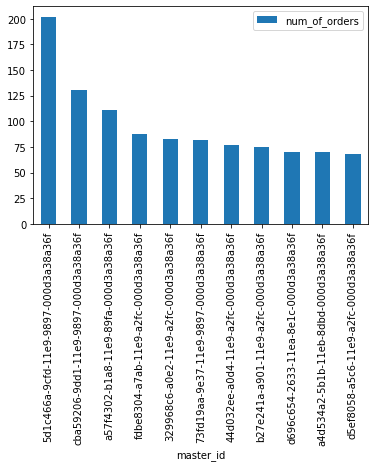

In [13]:
df.groupby("master_id")["num_of_orders"].sum().reset_index().set_index("master_id").sort_values(by="num_of_orders",ascending=False).head(11).plot(kind="bar")
plt.show()

##### Top 10 customers by total_value_of_customer.

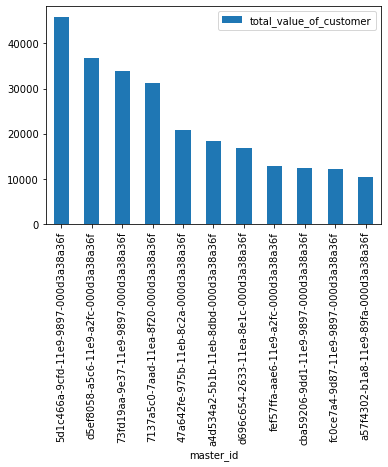

In [14]:
df.groupby("master_id")["total_value_of_customer"].sum().reset_index().set_index("master_id").sort_values(by="total_value_of_customer",ascending=False).head(11).plot(kind="bar")
plt.show()

##### Difference between order channels by total_value_of_customer.

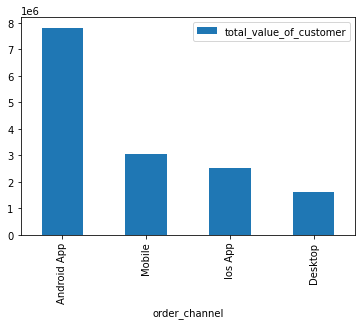

In [15]:
df.groupby("order_channel")["total_value_of_customer"].sum().reset_index().set_index("order_channel").sort_values(by="total_value_of_customer",ascending=False).plot(kind="bar")
plt.show()

##### Difference between order channels by num_of_orders.

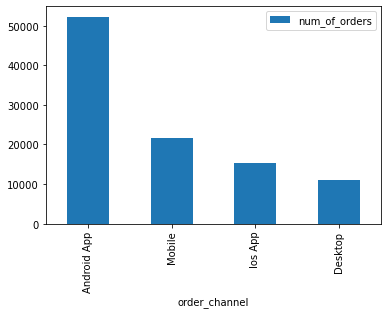

In [16]:
df.groupby("order_channel")["num_of_orders"].sum().reset_index().set_index("order_channel").sort_values(by="num_of_orders",ascending=False).plot(kind="bar")
plt.show()

##### Difference between interested_in_categories_12 by total_value_of_customer.

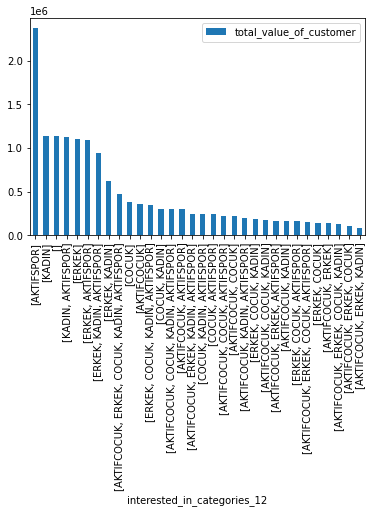

In [17]:
df.groupby("interested_in_categories_12")["total_value_of_customer"].sum().reset_index().set_index("interested_in_categories_12").sort_values(by="total_value_of_customer",ascending=False).plot(kind="bar")
plt.show()

##### Difference between interested_in_categories_12 by num_of_orders.

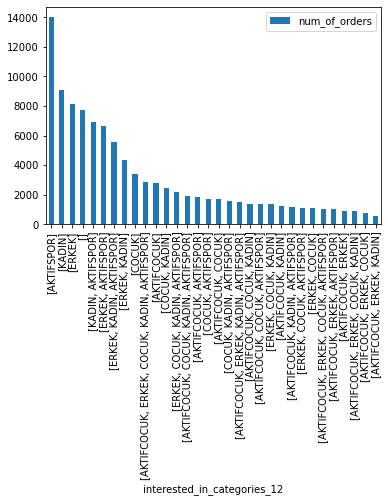

In [18]:
df.groupby("interested_in_categories_12")["num_of_orders"].sum().reset_index().set_index("interested_in_categories_12").sort_values(by="num_of_orders",ascending=False).plot(kind="bar")
plt.show()

### Now we'll create our RFM dataframe.

### RFM Dataframe:

+ Recency = (df["last_order_date"]-df["first_order_date"]).dt.days

+ Frequency = df["num_of_orders"]

+ Monetary = df["total_value_of_customer"]

In [19]:
df["Recency"]=(df["last_order_date"]-df["first_order_date"]).dt.days
df["Frequency"]=df["num_of_orders"]
df["Monetary"]=df["total_value_of_customer"]
df=df.drop(["order_channel"
         ,"first_order_date"
         ,"last_order_date"
         ,"interested_in_categories_12"   
         ,"num_of_orders"
         ,"total_value_of_customer"],axis=1)
df.head()

,master_id,Recency,Frequency,Monetary
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,5.0,939.37
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,21.0,2013.55
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,5.0,585.32
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,2.0,121.97
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,2.0,209.98


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Recency,19945.0,666.844472,522.126125,0.00,353.00,536.00,766.00,3034.0
Frequency,19945.0,5.024768,4.742707,2.00,3.00,4.00,6.00,202.0
Monetary,19945.0,751.244287,895.402173,44.98,339.98,545.27,897.78,45905.1


##### Creating our scores:

+ Recency_score = df["Recency_score"]=pd.qcut(df["Recency"],q=5,labels=[5,4,3,2,1])

+ Frequency_score = df["Recency_score"]=pd.qcut(df["Recency"],q=5,labels=[5,4,3,2,1])

+ Monetary_score = df["Recency_score"]=pd.qcut(df["Recency"],q=5,labels=[5,4,3,2,1])

In [21]:
df["Recency_score"]=pd.qcut(df["Recency"],q=5,labels=[5,4,3,2,1])
df["Frequency_score"]=pd.qcut(df["Frequency"].rank(method="first"),q=5,labels=[1,2,3,4,5])
df["Monetary_score"]=pd.qcut(df["Monetary"],q=5,labels=[1,2,3,4,5])
df.head()

,master_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,5.0,939.37,5,4,4
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,21.0,2013.55,1,5,5
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,5.0,585.32,4,4,3
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,2.0,121.97,5,1,1
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,2.0,209.98,3,1,1


##### Creating RF_score:

+ RF_score = df["RF_score"]=df["Recency_score"].astype(str)+df["Frequency_score"].astype(str)

In [22]:
df["RF_score"]=df["Recency_score"].astype(str)+df["Frequency_score"].astype(str)
df.head()

,master_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,5.0,939.37,5,4,4,54
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,21.0,2013.55,1,5,5,15
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,5.0,585.32,4,4,3,44
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,2.0,121.97,5,1,1,51
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,2.0,209.98,3,1,1,31


##### Creating our segments:

In [23]:
segmentation_map={
    r"[1-2][1-2]":"hibernating",
    r"[1-2][3-4]":"at_risk",
    r"[1-2]5":"cant_loose",
    r"3[1-2]":"about_to_sleep",
    r"33":"need_attention",
    r"[3-4][4-5]":"loyal_customers",
    r"41":"promising",
    r"51":"new_customers",
    r"[4-5][2-3]":"potential_loyalists",
    r"5[4-5]":"champions"
}
df["Segment"]=df["RF_score"].replace(segmentation_map,regex=True)
df.head()

,master_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,Segment
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,5.0,939.37,5,4,4,54,champions
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,21.0,2013.55,1,5,5,15,cant_loose
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,5.0,585.32,4,4,3,44,loyal_customers
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,2.0,121.97,5,1,1,51,new_customers
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,2.0,209.98,3,1,1,31,about_to_sleep


In [24]:
df[["Segment","Recency","Frequency","Monetary"]].groupby("Segment").agg(["count","sum","mean"])

Recency                       Frequency           \
                      count      sum         mean     count      sum   
Segment                                                                
about_to_sleep         1517   811773   535.117337      1517   3762.0   
at_risk                3251  3431538  1055.533067      3251  15270.0   
cant_loose             2791  3569513  1278.936940      2791  33588.0   
champions               616   124439   202.011364       616   3922.0   
hibernating            1918  1898803   989.991137      1918   4781.0   
loyal_customers        2741  1319738   481.480482      2741  18736.0   
need_attention          865   463910   536.312139       865   3239.0   
new_customers          1598   237999   148.935544      1598   3196.0   
potential_loyalists    3735  1086190   290.813922      3735  11899.0   
promising               913   356310   390.262870       913   1826.0   

                               Monetary                           
                          mean    count         sum         mean  
Segment                                                           
about_to_sleep        2.479895     1517   571310.81   376.605676  
at_risk               4.697016     3251  2158414.22   663.923168  
cant_loose           12.034396     2791  4706797.37  1686.419695  
champions             6.366883      616   671855.76  1090.674935  
hibernating           2.492701     1918   693524.74   361.587456  
loyal_customers       6.835462     2741  2934777.15  1070.695786  
need_attention        3.744509      865   482219.22   557.478867  
new_customers         2.000000     1598   536234.32   335.565907  
potential_loyalists   3.185810     3735  1933893.78   517.776112  
promising             2.000000      913   294539.94   322.606725

### Question 1:

+ FLO includes a new women's shoe brand. The product prices of the brand it includes are above the general customer preferences. For this reason, it is desired to contact the customers in the profile that will be interested in the promotion of the brand and product sales. Those who shop from their loyal customers (champions, loyal_customers) and women category are the customers to be contacted specifically. Record the id numbers of these customers.

##### We need categories variable. Beacuse of that we'll merge our datasets. Merged dataset:

In [25]:
df=df.merge(data["interested_in_categories_12"],how="left",right_index=True,left_index=True)
df.head()

,master_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,Segment,interested_in_categories_12
0,cc294636-19f0-11eb-8d74-000d3a38a36f,119,5.0,939.37,5,4,4,54,champions,[KADIN]
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,21.0,2013.55,1,5,5,15,cant_loose,"[ERKEK, COCUK, KADIN, AKTIFSPOR]"
2,69b69676-1a40-11ea-941b-000d3a38a36f,366,5.0,585.32,4,4,3,44,loyal_customers,"[ERKEK, KADIN]"
3,1854e56c-491f-11eb-806e-000d3a38a36f,11,2.0,121.97,5,1,1,51,new_customers,"[AKTIFCOCUK, COCUK]"
4,d6ea1074-f1f5-11e9-9346-000d3a38a36f,582,2.0,209.98,3,1,1,31,about_to_sleep,[AKTIFSPOR]


##### Filtered target customers. Choosed right categories. KADIN by categories, champions and loyal_customers by segments. This output is answer of Question 1.

In [26]:
target_customers=df[(df["interested_in_categories_12"]=="[KADIN]") & ((df["Segment"]=="champions") | (df["Segment"]=="loyal_customers"))]["master_id"]
target_customers.shape

(234,)

### Question 2:

+ Nearly 40% discount is planned for Men's and Children's products. It is aimed to specifically target customers who are good customers in the past, but who have not shopped for a long time, who are interested in the categories related to this discount, who should not be lost, those who are asleep and new customers. Record the IDs of the customers in the appropriate profile.

In [27]:
df["interested_in_categories_12"]=df["interested_in_categories_12"].str.strip("[|]")

##### Choosing right categories. ERKEK and COCUK categories.

In [28]:
df_=df[(df["interested_in_categories_12"].str.contains("ERKEK")) & (df["interested_in_categories_12"].str.contains("COCUK"))]
df_.head()

,master_id,Recency,Frequency,Monetary,Recency_score,Frequency_score,Monetary_score,RF_score,Segment,interested_in_categories_12
1,f431bd5a-ab7b-11e9-a2fc-000d3a38a36f,1469,21.0,2013.55,1,5,5,15,cant_loose,"ERKEK, COCUK, KADIN, AKTIFSPOR"
8,cfbda69e-5b4f-11ea-aca7-000d3a38a36f,409,5.0,1054.69,4,4,5,44,loyal_customers,"ERKEK, COCUK, KADIN"
47,09797cba-5b4a-11ea-8975-000d3a38a36f,488,4.0,869.93,3,3,4,33,need_attention,"AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR"
49,6925c836-ab8b-11e9-a2fc-000d3a38a36f,1220,6.0,740.53,1,4,4,14,at_risk,"ERKEK, COCUK"
60,07ddfcfe-2590-11ea-b1c8-000d3a38a36f,586,8.0,600.65,3,5,3,35,loyal_customers,"AKTIFCOCUK, ERKEK, KADIN, AKTIFSPOR"


##### Filtered potential customers. cant_loose, about_to_sleep and new_customers segments. Also this output is our answer of Question 2.

In [29]:
potential_customers=df_[(df_["Segment"]=="cant_loose") | (df_["Segment"]=="about_to_sleep") | (df_["Segment"]=="new_customers")]["master_id"]
potential_customers.head()

1     f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
68    444de882-b067-11e9-9757-000d3a38a36f
80    b4f0a6e6-ae60-11e9-a2fc-000d3a38a36f
83    7bb4c782-a450-11e9-a2fc-000d3a38a36f
85    d8f47744-a595-11e9-a2fc-000d3a38a36f
Name: master_id, dtype: object

### Creating Function for Question 1:

In [30]:
def question_1(dataframe,csv=False):
    
    # Dropping NAN values
    
    dataframe.dropna(inplace=True)
    
    # Changing dtypes
    
    dataframe["first_order_date"]=pd.to_datetime(dataframe["first_order_date"])
    dataframe["last_order_date"]=pd.to_datetime(dataframe["last_order_date"])
    dataframe["last_order_date_online"]=pd.to_datetime(dataframe["last_order_date_online"])
    dataframe["last_order_date_offline"]=pd.to_datetime(dataframe["last_order_date_offline"])
    
    # Dropping online-offline variables
    
    dataframe=dataframe.drop(["last_order_channel","last_order_date_online","last_order_date_offline"],axis=1)
    
    # Creating new variables for eliminating online-offline difference
    
    dataframe["num_of_orders"]=dataframe["order_num_total_ever_offline"]+dataframe["order_num_total_ever_online"]
    dataframe=dataframe.drop(["order_num_total_ever_offline","order_num_total_ever_online"],axis=1)
    dataframe["total_value_of_customer"]=dataframe["customer_value_total_ever_offline"]+dataframe["customer_value_total_ever_online"]
    dataframe=dataframe.drop(["customer_value_total_ever_offline","customer_value_total_ever_online"],axis=1)
    
    # Creating RFM dataframe
    
    dataframe["Recency"]=(dataframe["last_order_date"]-dataframe["first_order_date"]).dt.days
    dataframe["Frequency"]=dataframe["num_of_orders"]
    dataframe["Monetary"]=dataframe["total_value_of_customer"]
    dataframe=dataframe.drop(["order_channel"
             ,"first_order_date"
             ,"last_order_date"
             ,"num_of_orders"
             ,"total_value_of_customer"],axis=1)
    
    # Creating RFM scores
    
    dataframe["Recency_score"]=pd.qcut(dataframe["Recency"],q=5,labels=[5,4,3,2,1])
    dataframe["Frequency_score"]=pd.qcut(dataframe["Frequency"].rank(method="first"),q=5,labels=[1,2,3,4,5])
    dataframe["Monetary_score"]=pd.qcut(dataframe["Monetary"],q=5,labels=[1,2,3,4,5])   
    dataframe["RF_score"]=dataframe["Recency_score"].astype(str)+dataframe["Frequency_score"].astype(str)

    # Creating segments
    
    segmentation_map={
        r"[1-2][1-2]":"hibernating",
        r"[1-2][3-4]":"at_risk",
        r"[1-2]5":"cant_loose",
        r"3[1-2]":"about_to_sleep",
        r"33":"need_attention",
        r"[3-4][4-5]":"loyal_customers",
        r"41":"promising",
        r"51":"new_customers",
        r"[4-5][2-3]":"potential_loyalists",
        r"5[4-5]":"champions"
    }
    dataframe["Segment"]=dataframe["RF_score"].replace(segmentation_map,regex=True)
    
    # Question 1
    
    target_customers=dataframe[(dataframe["interested_in_categories_12"]=="[KADIN]") & ((dataframe["Segment"]=="champions") | (dataframe["Segment"]=="loyal_customers"))]["master_id"]
    
    # csv output
    
    if csv == True:
        target_customers.to_csv()
    
    return target_customers

In [31]:
question_1(data,csv=False)

0        cc294636-19f0-11eb-8d74-000d3a38a36f
54       e7fa4114-e7cc-11e9-8bb8-000d3a38a36f
141      b6305fbe-5b4f-11ea-bb88-000d3a38a36f
244      a30b93f8-a4fd-11e9-a2fc-000d3a38a36f
314      4c7d87f0-a52d-11e9-a2fc-000d3a38a36f
                         ...                 
19828    265f99c0-2221-11ea-8523-000d3a38a36f
19873    af25bc82-5bdb-11ea-9c29-000d3a38a36f
19878    e06651f8-f349-11e9-9346-000d3a38a36f
19883    c6d0256a-9dcd-11e9-9897-000d3a38a36f
19912    f63aba0e-41d8-11ea-96d9-000d3a38a36f
Name: master_id, Length: 234, dtype: object

### Creating Function for Question 2:

In [32]:
def question_2(dataframe,csv=False):
    
    # Dropping NAN values
    
    dataframe.dropna(inplace=True)
    
    # Changing dtypes
    
    dataframe["first_order_date"]=pd.to_datetime(dataframe["first_order_date"])
    dataframe["last_order_date"]=pd.to_datetime(dataframe["last_order_date"])
    dataframe["last_order_date_online"]=pd.to_datetime(dataframe["last_order_date_online"])
    dataframe["last_order_date_offline"]=pd.to_datetime(dataframe["last_order_date_offline"])
    
    # Dropping online-offline variables
    
    dataframe=dataframe.drop(["last_order_channel","last_order_date_online","last_order_date_offline"],axis=1)
    
    # Creating new variables for eliminating online-offline difference
    
    dataframe["num_of_orders"]=dataframe["order_num_total_ever_offline"]+dataframe["order_num_total_ever_online"]
    dataframe=dataframe.drop(["order_num_total_ever_offline","order_num_total_ever_online"],axis=1)
    dataframe["total_value_of_customer"]=dataframe["customer_value_total_ever_offline"]+dataframe["customer_value_total_ever_online"]
    dataframe=dataframe.drop(["customer_value_total_ever_offline","customer_value_total_ever_online"],axis=1)
    
    # Creating RFM dataframe
    
    dataframe["Recency"]=(dataframe["last_order_date"]-dataframe["first_order_date"]).dt.days
    dataframe["Frequency"]=dataframe["num_of_orders"]
    dataframe["Monetary"]=dataframe["total_value_of_customer"]
    dataframe=dataframe.drop(["order_channel"
             ,"first_order_date"
             ,"last_order_date"
             ,"num_of_orders"
             ,"total_value_of_customer"],axis=1)
    
    # Creating RFM scores
    
    dataframe["Recency_score"]=pd.qcut(dataframe["Recency"],q=5,labels=[5,4,3,2,1])
    dataframe["Frequency_score"]=pd.qcut(dataframe["Frequency"].rank(method="first"),q=5,labels=[1,2,3,4,5])
    dataframe["Monetary_score"]=pd.qcut(dataframe["Monetary"],q=5,labels=[1,2,3,4,5])   
    dataframe["RF_score"]=dataframe["Recency_score"].astype(str)+dataframe["Frequency_score"].astype(str)

    # Creating segments
    
    segmentation_map={
        r"[1-2][1-2]":"hibernating",
        r"[1-2][3-4]":"at_risk",
        r"[1-2]5":"cant_loose",
        r"3[1-2]":"about_to_sleep",
        r"33":"need_attention",
        r"[3-4][4-5]":"loyal_customers",
        r"41":"promising",
        r"51":"new_customers",
        r"[4-5][2-3]":"potential_loyalists",
        r"5[4-5]":"champions"
    }
    dataframe["Segment"]=dataframe["RF_score"].replace(segmentation_map,regex=True)
    
    # Question 2
    
    dataframe["interested_in_categories_12"]=dataframe["interested_in_categories_12"].str.strip("[|]")    
    dataframe=dataframe[(dataframe["interested_in_categories_12"].str.contains("ERKEK")) & (dataframe["interested_in_categories_12"].str.contains("COCUK"))]
    potential_customers=dataframe[(dataframe["Segment"]=="cant_loose") | (dataframe["Segment"]=="about_to_sleep") | (dataframe["Segment"]=="new_customers")]["master_id"]
    
    # csv output
    
    if csv == True:
        potential_customers.to_csv()
    
    return potential_customers

In [33]:
question_2(data)

1        f431bd5a-ab7b-11e9-a2fc-000d3a38a36f
68       444de882-b067-11e9-9757-000d3a38a36f
80       b4f0a6e6-ae60-11e9-a2fc-000d3a38a36f
83       7bb4c782-a450-11e9-a2fc-000d3a38a36f
85       d8f47744-a595-11e9-a2fc-000d3a38a36f
                         ...                 
19776    e2b71cc4-b039-11e9-9757-000d3a38a36f
19797    51d2be0e-a588-11e9-a2fc-000d3a38a36f
19844    d6e2bef4-aef8-11e9-a2fc-000d3a38a36f
19856    07bcae98-a81b-11e9-a2fc-000d3a38a36f
19907    b5625f4e-a151-11eb-a568-000d3a38a36f
Name: master_id, Length: 665, dtype: object